In [ ]:
---
  title: "HW 02"
  author: "KOMMAREDDY MONICA TEJASWI"
  format:
    html:
      embed-resources: true
  toc: true
  jupyter: python3
  ---

## Step 1: Setup and Data Preprocessing

- Start by importing the necessary libraries and load the spam.csv dataset.

- Preprocess the data by encoding categorical variables, defining features and target, and splitting the data into training and testing sets. Finally, apply PCA to reduce dimensionality.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize


# Load the dataset
spam = pd.read_csv("data/spam.csv")

# Encode categorical variables
categorical_columns = spam.select_dtypes(include = ['object', 'category']).columns.tolist()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    spam[col] = label_encoders[col].fit_transform(spam[col])

# Define features and target
X = spam.drop('yesno', axis = 1)
y = spam['yesno']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reduce dimensionality
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Step 2: Model Training and Decision Boundary Visualization

- Train a Decision Tree classifier on the PCA-transformed training data.

- Implement and use the `decisionplot` function (from the lecture) to visualize the decision boundary of your trained model.

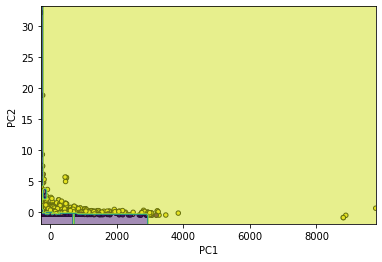

In [11]:
#| eval: false
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Train Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

# Implement the decisionplot function (as provided in the lecture content)
# Add the decisionplot function here
def decisionplot(model, X, y, resolution=216):
    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    if isinstance(model, LinearDiscriminantAnalysis):
        # For LDA, we need to use the decision_function method
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if isinstance(model, LinearDiscriminantAnalysis):
    # Reshape LDA decision function output appropriately
        Z = Z.reshape(-1, 1)
    else:
        Z = Z.reshape(xx.shape)

    # Plot the actual data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', s=20)

    # Overlay the decision boundary
    plt.contourf(xx, yy, Z, alpha = 0.5)
    
    # Calculate the accuracy
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    
  
    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()

# Visualize decision boundary
decisionplot(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)


## Step 3: Model Evaluation

- Evaluate your model using accuracy, precision, recall, F1 score, and AUC-ROC metrics.

In [20]:
#| eval: false
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Predictions
predictions = dtree.predict(X_test_pca)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average = 'weighted')
recall = recall_score(y_test, predictions, average = 'weighted')
f1 = f1_score(y_test, predictions, average = 'weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# For AUC-ROC, binarize the output and calculate AUC-ROC for each class
# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes = np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Get the probability predictions for each class
y_score = dtree.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Add the necessary code for AUC-ROC calculation here (refer to lecture content)
# Calculate macro-average ROC-AUC
roc_auc_macro = np.mean(list(roc_auc.values()))
print(f"Macro-average ROC-AUC: {roc_auc_macro:.2f}")

# Calculate micro-average ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score[:,1])
roc_auc_micro = auc(fpr["micro"], tpr["micro"])
print(f"Micro-average ROC-AUC: {roc_auc_micro:.2f}")


Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.80
Macro-average ROC-AUC: 0.23
Micro-average ROC-AUC: 0.77


## Assignment:
- Implement the missing parts of the code: the decisionplot function and AUC-ROC calculation.

- Discuss the results among your peers. Consider the following:

    - Which metric is most informative for this problem and why?

    - How does the decision boundary visualization help in understanding the model’s performance?

    - Reflect on the impact of PCA on model performance and decision boundary.



A Decision Tree classifier trained on PCA-transformed data is used to evaluate classification performance using important measures including accuracy, precision, recall, and F1-score. These metrics give information about the model's ability to categorise events and generate accurate predictions. AUC-ROC scores are used to assess the classifier's ability to differentiate between classes. These give info about the classifier's accuracy and discriminatory power. The findings emphasise the vital need of thoroughly evaluating model performance, particularly when using PCA for dimensionality reduction. The accuracy and ability to successfully differentiate between distinct classes within the dataset can be achieved using this approach. PCA is used to improve model efficiency and efficacy by employing rigorous assessment methods..